## Amazon Web Scraper




•	In this project, I used scrap the data from amazon India website. Before getting into it, we have to know what is Web Scraping. Web Scraping is nothing but the process of extracting the data from the website. And this information is collected and then exported into a format that is more useful for the user. Be it spreadsheet or an API.

•	So there is also an important thing to be known about web scraping. It is illegal when non publicly available data was extracted.

•	Now, We are going to extract some data from the amazon and then converting those data to the CSV file (Example into Microsoft Excel)

•	I was going to extract some data’s about Iphone which is available in Amazon India Website, like details about descrption, Price, Review count and Star rating out of 5 star. 


## Libraries

So three most important libraries are need for this web scrapping project

•	csv

•	bs4

•	selenium


In [50]:
import csv
from bs4 import BeautifulSoup

In [51]:
#Firefox & Chrome
from selenium import webdriver

## Startup the Webdriver

A webdriver is a tool that allows you to automate interactions with a web browser

In [52]:
#instance of the webdriver for chrome
driver = webdriver.Chrome()

In [53]:
url = 'https://amazon.in'
driver.get(url)

The below code is to get the required result from the search itself. So like if we enter what we want to search in amazon.

In [13]:
def get_url(search_term):
    """ Generate a url from the search term """
    # replacing the searched word with the curly bracket!
    template = 'https://www.amazon.in/s?k={}&sprefix=4K%2Caps%2C303&ref=nb_sb_ss_ts-doa-p_1_2'
    search_term = search_term.replace(' ','+')
    return template.format(search_term)

In [55]:
url = get_url('iphones')
print(url)

https://www.amazon.in/s?k=iphones&sprefix=4K%2Caps%2C303&ref=nb_sb_ss_ts-doa-p_1_2&page{}


In [54]:
driver.get(url)

## Extract the collection

So now we use to extract the entire code by using the html parser.

In [8]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [10]:
results = soup.find_all('div',{'data-component-type': 's-search-result'})

In [12]:
len(results)

22

## Prototype the record

Now we are testing for the first product of iPhone,
Like we are getting the data like description, url, price, rating, and review count.


In [36]:
item = results[0]

In [37]:
atag = item.h2.a

In [38]:
description = atag.text.strip()

In [39]:
url = 'https://www.amazon.in'+atag.get('href')

In [41]:
price_parent = item.find('span', 'a-price')

In [42]:
price = price_parent.find('span', 'a-offscreen').text

In [49]:
rating = item.i.text

In [71]:
review_count = item.find('span', {'class': 'a-size-base'}).text

In [72]:
print(review_count)

1,690


## Generalize the Pattern

So now, we are now making the code into simple snippet

In [77]:
def extract_record(item):
    """ Extract and return data from a single record"""
    
    #description and url
    atag = item.h2.a
    description = atag.text.strip()
    url = 'https://www.amazon.in'+atag.get('href')
    
    #price
    price_parent = item.find('span', 'a-price')
    price = price_parent.find('span', 'a-offscreen').text
    
    #rank and rating
    rating = item.i.text
    review_count = item.find('span', {'class': 'a-size-base'}).text
    
    #creating the tuple reviewing and returning the result in form of tuple
    result = (description, price, rating, review_count, url)
    
    return result

In [81]:
records = []
results = soup.find_all('div',{'data-component-type': 's-search-result'})

#iteration through each item
for item in results:
    records.append(extract_record(item))
    

## Error Handling

We are just handling the error by just using try-except block, for the code which not extract no data.

In [82]:
def extract_record(item):
    """ Extract and return data from a single record"""
    
    #description and url
    atag = item.h2.a
    description = atag.text.strip()
    url = 'https://www.amazon.in'+atag.get('href')
    
    try:
        #price
        price_parent = item.find('span', 'a-price')
        price = price_parent.find('span', 'a-offscreen').text
    except AttributeError:
        return
    try:
        #rank and rating
        rating = item.i.text
        review_count = item.find('span', {'class': 'a-size-base'}).text
    except AttributeError:
        rating = ''
        review_count = ''
        
    #creating the tuple reviewing and returning the result in form of tuple
    result = (description, price, rating, review_count, url)
    
    return result

In [86]:
records = []
results = soup.find_all('div',{'data-component-type': 's-search-result'})

#iteration through each item
for item in results:
    record = extract_record(item)
    if record:
        records.append(record)

In [87]:
records[0]

('Apple iPhone 13 Mini (512GB) - Pink',
 '₹89,999',
 '4.5 out of 5 stars',
 '1,690',
 'https://www.amazon.in/sspa/click?ie=UTF8&spc=MTo1ODA2NTQ3NDkyNTU2Mjc2OjE2ODE4OTM2Mzg6c3BfYXRmOjIwMDc5NjgyODQ3NTAzOjowOjo&url=%2FApple-iPhone-13-Mini-512GB%2Fdp%2FB09G997HJP%2Fref%3Dsr_1_1_sspa%3Fkeywords%3Dmobile%2Bphones%26qid%3D1681893638%26sprefix%3D4K%252Caps%252C303%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1')

In [89]:
for rows in records:
    print(rows[1])

₹89,999
₹1,09,999
₹8,499
₹18,999
₹34,999
₹8,999
₹5,899
₹28,999
₹12,999
₹6,499
₹1,19,999
₹1,39,900
₹8,999
₹12,999
₹15,490
₹28,999
₹8,499
₹5,899
₹19,499
₹44,999
₹71,999
₹5,999


## Getting next Page

Until now we are only getting the data of the 1st page of the respective, but we have to get the complete data so now going through entire page till the end.

In [90]:
# get url function
def get_url(search_term):
    """ Generate a url from the search term """
    # replacing the searched word with the curly bracket!
    template = 'https://www.amazon.in/s?k={}&sprefix=4K%2Caps%2C303&ref=nb_sb_ss_ts-doa-p_1_2'
    search_term = search_term.replace(' ','+')
    
    #add term query to url
    url = template.format(search_term)
    
    #add page query placeholder 
    
    url += '&page{}'
    
    return url

## Putting all together

In [56]:
import csv
from bs4 import BeautifulSoup
from selenium import webdriver

# get url function


def get_url(search_term):
    """ Generate a url from the search term """
    # replacing the searched word with the curly bracket!
    template = 'https://www.amazon.in/s?k={}&sprefix=4K%2Caps%2C303&ref=nb_sb_ss_ts-doa-p_1_2'
    search_term = search_term.replace(' ','+')
    
    #add term query to url
    url = template.format(search_term)
    
    #add page query placeholder 
    
    url += '&page{}'
    
    return url



#Error Handling 

def extract_record(item):
    """ Extract and return data from a single record"""
    
    #description and url
    atag = item.h2.a
    description = atag.text.strip()
    url = 'https://www.amazon.in'+atag.get('href')
    
    try:
        #price
        price_parent = item.find('span', 'a-price')
        price = price_parent.find('span', 'a-offscreen').text
    except AttributeError:
        return
    try:
        #rank and rating
        rating = item.i.text
        review_count = item.find('span', {'class': 'a-size-base'}).text
    except AttributeError:
        rating = ''
        review_count = ''
        
    #creating the tuple reviewing and returning the result in form of tuple
    result = (description, price, rating, review_count, url)
    
    return result




# Main Functions

def main(search_term):
    """Run main program routine!"""
    
    #startup the webdriver
    driver = webdriver.Chrome()
    
    #creating records lists
    records = []
    url = get_url(search_term)
    
    #irrating over 20 pages
    
    for page in range(1,21):
        driver.get(url.format(page))
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        results = soup.find_all('div',{'data-component-type': 's-search-result'})
        
        for items in results:
            record = extract_record(items)
            if record:
                records.append(record)
                
    driver.close()

    

# save data to the csv file
    
    with open('iphoneresults.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.writer(f)
        writer.writerow(['Description', 'Price', 'Rating', 'ReviewCount', 'Url'])
        writer.writerows(records)

In [57]:
main('iphone')

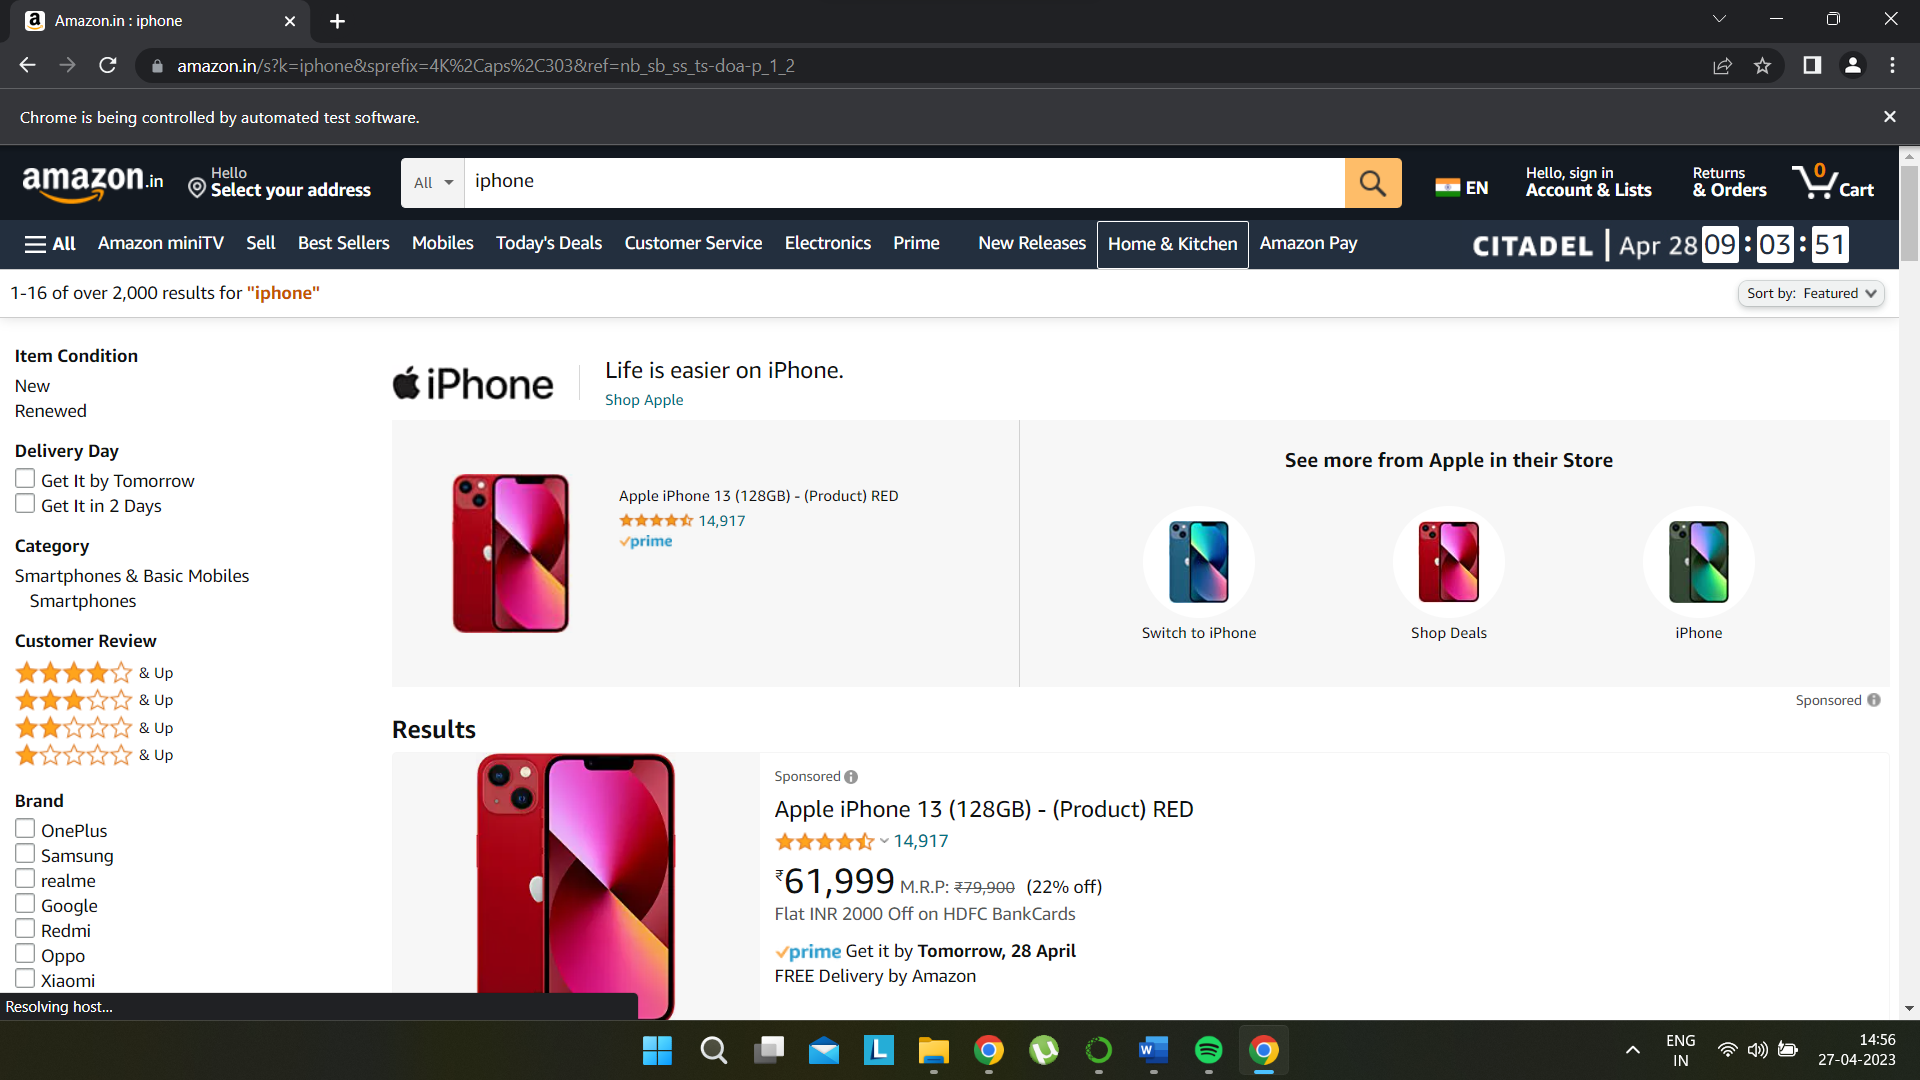

So in the above picture we can se that the chrome is automatically operated by the webdriver and start extract the data.

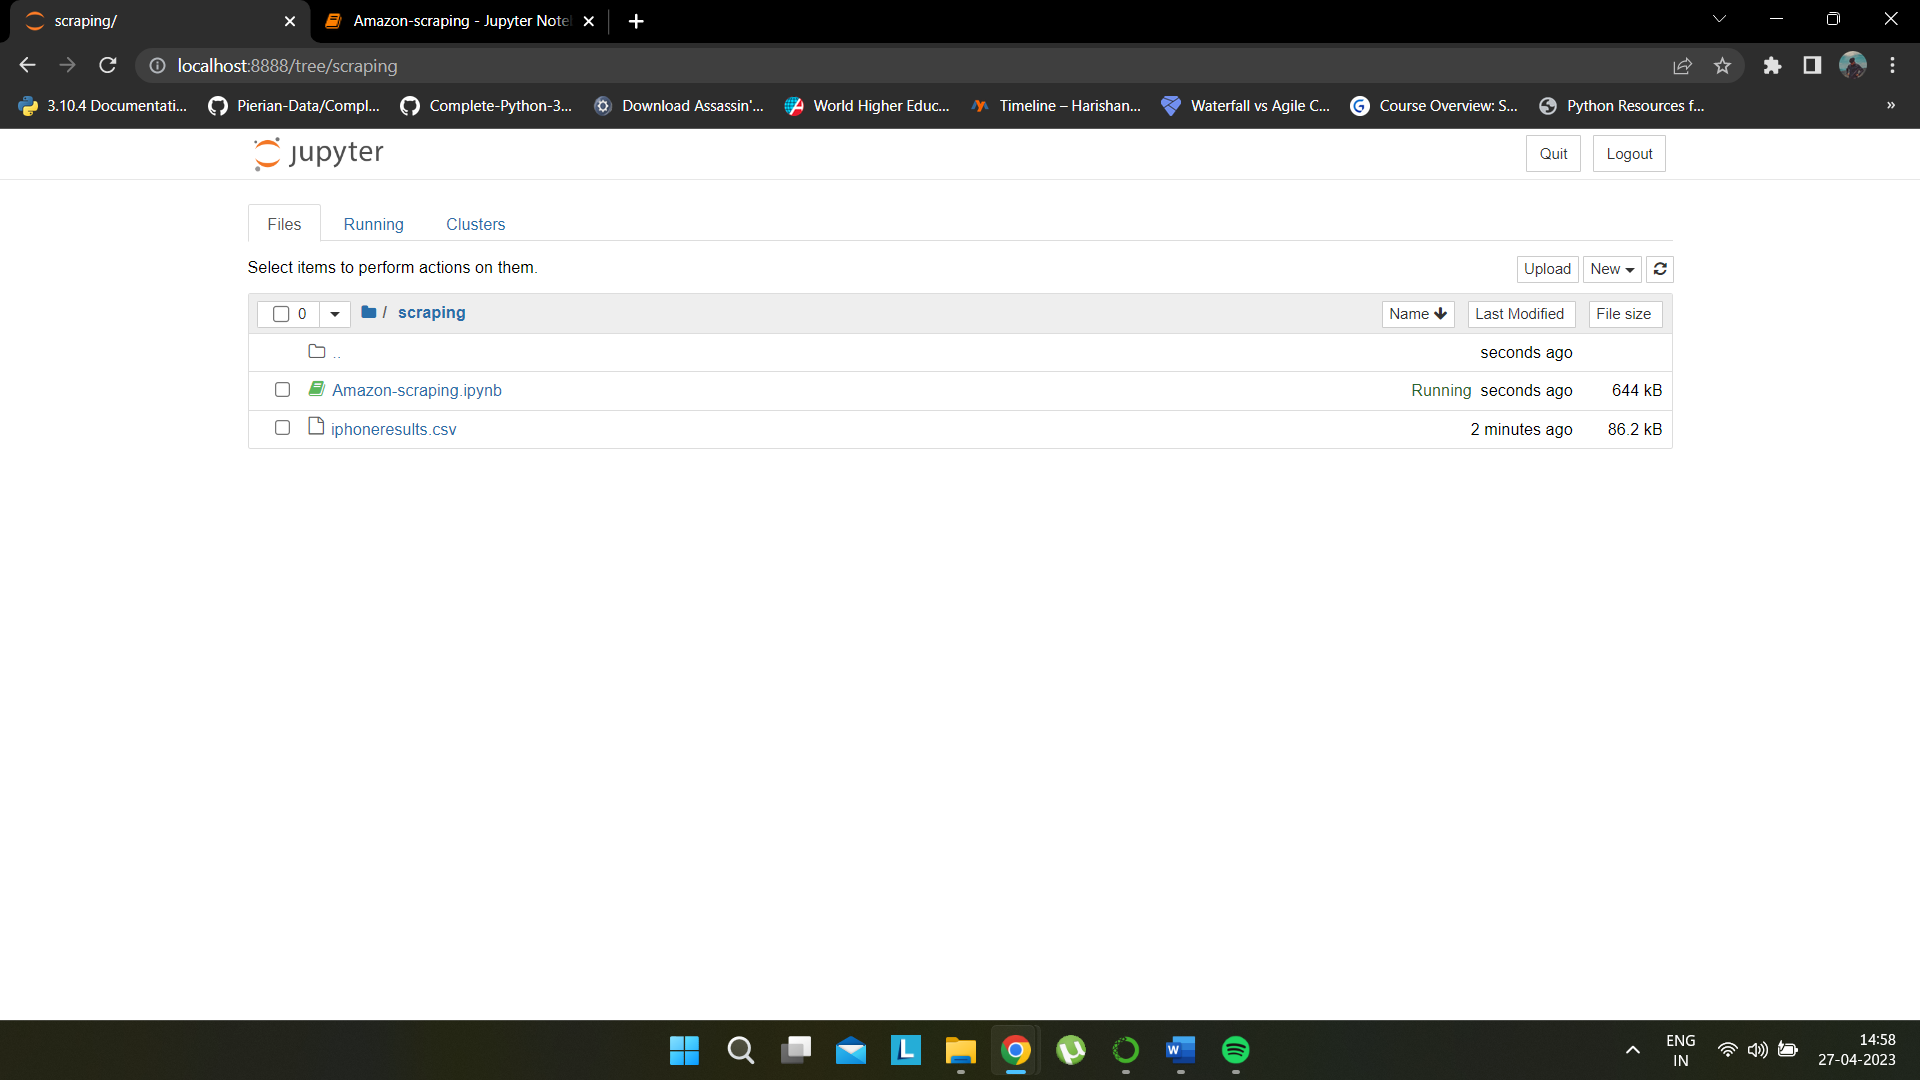

The output means like the entire result was in the csv file (Excel File)

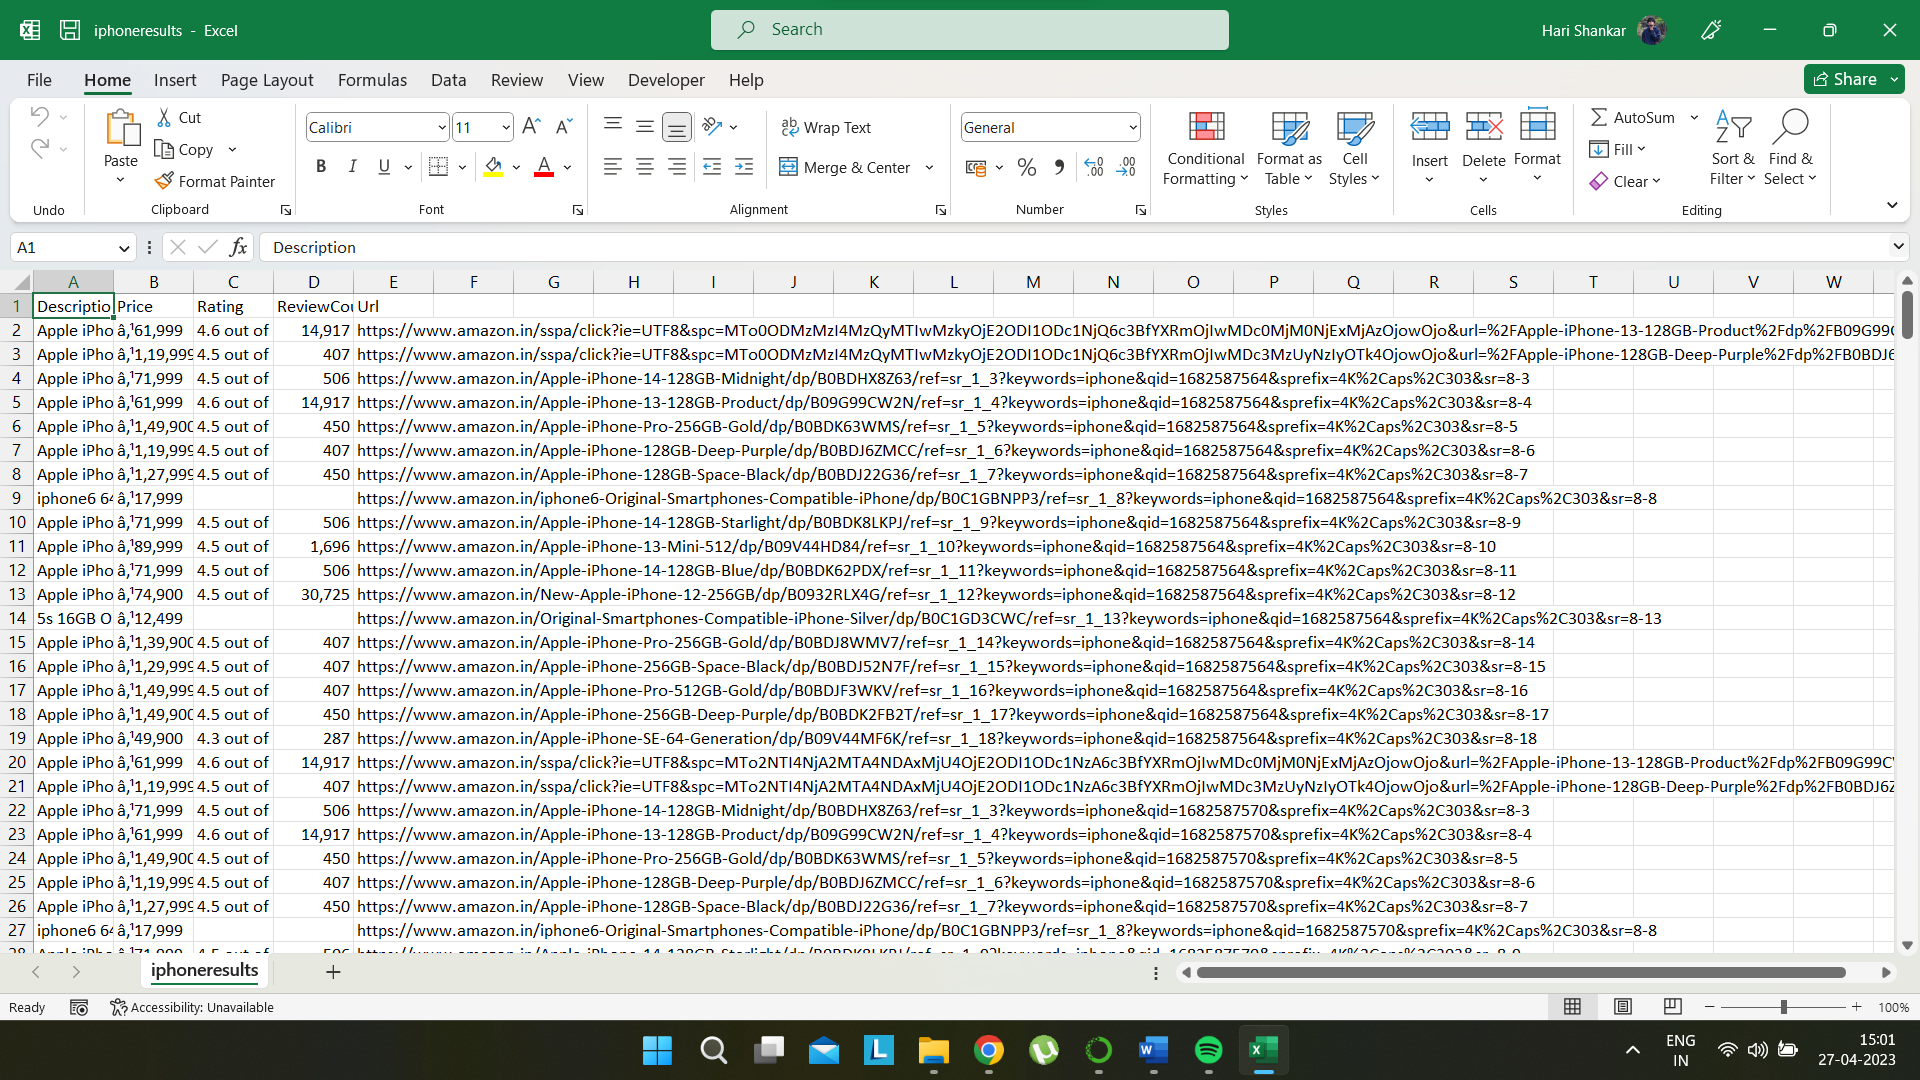

So the complete result was saved in the name of 'iphoneresults.csv' file!

.

.

This project was done by Harishankar Murugan!

Email : harishankarmurugan21@gmail.com